<a href="https://colab.research.google.com/github/DavidToca/ML-Toronto-AutoTheft/blob/main/ML_AutoTheft_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset of Major Crime Indicators Open Data

## Source:
https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-open-data/about

## Description:

This dataset includes all Major Crime Indicators (MCI) occurrences by reported date and related
offences. The MCI categories include Assault, Break and Enter, Auto Theft, Robbery and Theft
Over. This data is provided at the offence and/or victim level, therefore one occurrence number
may have several records associated to the various MCIs used to categorize the occurrence. This
data does not include occurrences that have been deemed unfounded. The definition of
unfounded according to Statistics Canada is: “It has been determined through police
investigation that the offence reported did not occur, nor was it attempted” (Statistics Canada,
2020).

# Documentation

Toronto police provides documentation of this dataset that shows what each field represents here  https://torontops.maps.arcgis.com/sharing/rest/content/items/c0b17f1888544078bf650f3b8b04d35d/data. As we will see soon, this information is incomplete.

I've extracted the documentation from this fields here:

| Field | FieldName | Description |
|----------|----------|----------|
1|EVENT_UNIQUE_ID|Offence Number
2|REPORT_DATE|Date Offence was Reported (time is displayed in UTCformat when downloaded as a CSV)
3|OCC_DATE| Date Offence Occurred (time is displayed in UTC format when downloaded as a CSV)
4|REPORT_YEAR| Year Offence was Reported
5|REPORT_MONTH| Month Offence was Reported
6|REPORT_DAY| Day of the Month Offence was Reported
7|REPORT_DOY| Day of the Year Offence was Reported
8|REPORT_DOW| Day of the Week Offence was Reported
9|REPORT_HOUR| Hour Offence was Reported
10|OCC_YEAR| Year Offence Occurred
11|OCC_MONTH| Month Offence Occurred
12|OCC_DAY| Day of the Month Offence Occurred
13|OCC_DOY| Day of the Year Offence Occurred
14|OCC_DOW| Day of the Week Offence Occurred
15|OCC_HOUR|Hour Offence Occurred
16|DIVISION|Police Division where Offence Occurred
17|LOCATION_TYPE|Location Type of Offence
18|PREMISES_TYPE|Premises Type of Offence
19|UCR_CODE|UCR Code for Offence
20|UCR_EXT|UCR Extension for Offence
21|OFFENCE|Title of Offence
22|MCI_CATEGORY|MCI Category of Occurrence
23|HOOD_158|Identifier of Neighbourhood using City of Toronto's new 158 neighbourhood structure
24|NEIGHBOURHOOD_158|Name of Neighbourhood using City of Toronto's new 158 neighbourhood structure
25|HOOD_140|Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure
26|NEIGHBOURHOOD_140|Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure
27|LONG_WGS84|Longitude Coordinates (Offset to nearest intersection)
28|LAT_WGS84|Latitude Coordinates (Offset to nearest intersection)

# Objective
Develop a model that predicts auto theft crimes in Toronto

# EDA

Let's start by loading the data, and identifying outstanding information.
(Download the dataset and place it in /content/Major_Crime_Indicators_Open_Data.csv)

In [492]:
import pandas as pd
# TODO - load from google drive (make sure that file is public)
FILE_PATH = "/content/Major_Crime_Indicators_Open_Data.csv"
df = pd.read_csv(FILE_PATH)

print(df.shape)

(372899, 31)


We notice that we have 31 columns, but acording to the documentation only accounts for 28 columns. Let's further explore the data

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372899 entries, 0 to 372898
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  372899 non-null  float64
 1   Y                  372899 non-null  float64
 2   OBJECTID           372899 non-null  int64  
 3   EVENT_UNIQUE_ID    372899 non-null  object 
 4   REPORT_DATE        372899 non-null  object 
 5   OCC_DATE           372899 non-null  object 
 6   REPORT_YEAR        372899 non-null  int64  
 7   REPORT_MONTH       372899 non-null  object 
 8   REPORT_DAY         372899 non-null  int64  
 9   REPORT_DOY         372899 non-null  int64  
 10  REPORT_DOW         372899 non-null  object 
 11  REPORT_HOUR        372899 non-null  int64  
 12  OCC_YEAR           372788 non-null  float64
 13  OCC_MONTH          372788 non-null  object 
 14  OCC_DAY            372788 non-null  float64
 15  OCC_DOY            372788 non-null  float64
 16  OC

# Analysis

💡 The 2 extra columns correspond to coordinates X and Y.

🚨 There's no non-null values, that's good news.

We don't have any description about the crimes, but we have 2 columns OFFENCE and MCI_CATEGORY that can help us identify if it's an autothef

In [494]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.809036e+06,5.431523e+06,1,GO-20141260264,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,143,West Rouge,131,Rouge (131),-79.132915,43.780413
1,-8.814320e+06,5.435514e+06,2,GO-20141260033,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,144,Morningside Heights,131,Rouge (131),-79.180387,43.806289
2,-8.832825e+06,5.419631e+06,3,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.346615,43.703234
3,-8.847292e+06,5.429042e+06,4,GO-20141264084,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,1,...,1420,110,Assault Bodily Harm,Assault,27,York University Heights,27,York University Heights (27),-79.476579,43.764317
4,6.327780e-09,5.664924e-09,5,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000


We can notice that we have multiple crimes being logged, not sure autotheft. We also notice that we have 2014 data. Let's explore this in more detail.

In [495]:
# prompt: group by OFFENCE, then show me which values it has, order by the one with the most count. show this as a PIE chart

import matplotlib.pyplot as plt

# Group the data by OFFENCE and count the occurrences
offence_counts = df['OFFENCE'].value_counts()
display(offence_counts)


Assault                           135392
B&E                                59033
Theft Of Motor Vehicle             58441
Assault With Weapon                33764
Robbery - Mugging                   9053
B&E W'Intent                        8754
Assault Bodily Harm                 8555
Theft Over                          6961
Assault Peace Officer               6278
Robbery With Weapon                 6134
Robbery - Other                     5634
Robbery - Business                  5222
Assault - Resist/ Prevent Seiz      3381
Theft From Motor Vehicle Over       3075
Aggravated Assault                  2884
Robbery - Swarming                  2524
Discharge Firearm With Intent       2300
Unlawfully In Dwelling-House        2219
Discharge Firearm - Recklessly      1664
Theft From Mail / Bag / Key         1464
Pointing A Firearm                  1350
Robbery - Home Invasion             1290
Robbery - Vehicle Jacking           1211
Robbery - Purse Snatch              1122
Robbery - Financ

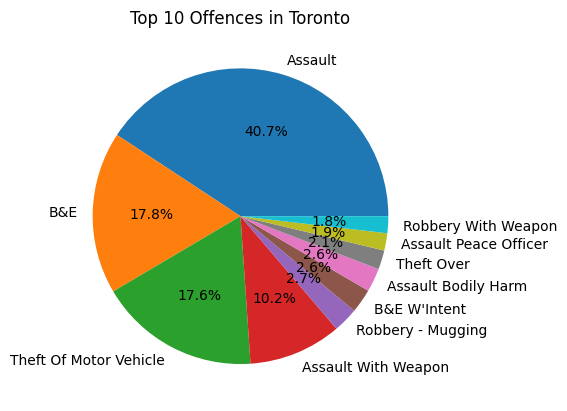

In [496]:
# Get the top 10 offences
top_10_offences = offence_counts.head(10)

# Create a pie chart
plt.pie(top_10_offences, labels=top_10_offences.index, autopct='%1.1f%%')
plt.title('Top 10 Offences in Toronto')
plt.show()

# Analysis

💡 There are two interesting offences: "Theft Of Motor Vehicle" and "Theft From Motor Vehicle Over".

After some digging, this is what I found:

"Theft From Motor Vehicle Over": This category refers to theft of items from inside a motor vehicle. It includes incidents where items such as personal belongings, electronic devices, or valuables are stolen from a vehicle, typically without the vehicle itself being stolen. Examples include theft of purses, wallets, laptops, or electronic gadgets left in plain sight within the vehicle.

"Theft From Motor Vehicle Over": This category refers to the theft of the motor vehicle itself. It includes incidents where the entire vehicle is stolen by unauthorized individuals. This can involve stealing parked cars from public streets, parking lots, or private driveways. In some cases, stolen vehicles may be used for joyriding, resale, or other criminal activities.

Based on this, we will only be using **Theft From Motor Vehicle Over**

💡 **We can also see that "Theft Of Motor Vehicle" is the third most reported crime across all years**

In [497]:
# check if there's a gap in the years.

display(sorted(df['OCC_YEAR'].unique()))


[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 nan,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2023.0]

In [498]:
# Let's check if we have any missing months across the years

offence_counts_per_month = df.groupby(['OCC_YEAR', 'OCC_MONTH']).size().reset_index(name='count')

offence_counts_per_month['OCC_MONTH'] = offence_counts_per_month['OCC_MONTH'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'], [1,2,3,4,5,6,7,8,9,10,11,12])

# Check if there's a month that is not here (1-12) for each year
for year in offence_counts_per_month['OCC_YEAR'].unique():
  months = offence_counts_per_month[offence_counts_per_month['OCC_YEAR'] == year]['OCC_MONTH'].unique()
  if not set(range(1, 13)).issubset(months):
    print(f"Year {year} is missing months.")


Year 2000.0 is missing months.
Year 2001.0 is missing months.
Year 2002.0 is missing months.
Year 2003.0 is missing months.
Year 2004.0 is missing months.
Year 2005.0 is missing months.
Year 2006.0 is missing months.
Year 2007.0 is missing months.
Year 2008.0 is missing months.


In [499]:
import matplotlib.pyplot as plt

# Group the data by OCC_YEAR and count the occurrences
offence_counts = df['OCC_YEAR'].value_counts()
display(offence_counts)

2023.0    47833
2022.0    41299
2019.0    40098
2018.0    37545
2017.0    35547
2020.0    35196
2021.0    34777
2016.0    33654
2015.0    32938
2014.0    32477
2013.0      620
2012.0      212
2011.0      143
2010.0      103
2009.0       82
2008.0       49
2005.0       36
2007.0       36
2004.0       31
2000.0       27
2006.0       23
2002.0       23
2001.0       22
2003.0       17
Name: OCC_YEAR, dtype: int64

We can see that we have data back from 2003, but there's little to no date from 2003 to 2013. We will remove those from our data.

Since we have geographical data, let's dig into which neighbourhood has the most reports overall just out of curiosity.

In [500]:
import matplotlib.pyplot as plt

# Group the data by OCC_YEAR and count the occurrences
offence_counts_per_neig = df['NEIGHBOURHOOD_158'].value_counts()
display(offence_counts_per_neig)

West Humber-Clairville     10335
Moss Park                   8641
Downtown Yonge East         7768
Yonge-Bay Corridor          7314
York University Heights     7269
                           ...  
Yonge-St.Clair               757
Maple Leaf                   743
Guildwood                    688
Woodbine-Lumsden             658
Lambton Baby Point           591
Name: NEIGHBOURHOOD_158, Length: 159, dtype: int64

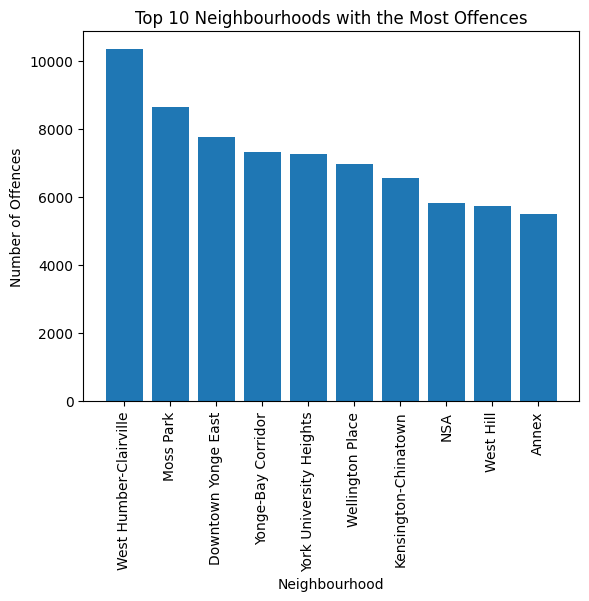

In [501]:
# prompt: ranking of top 10 offence_counts_per_neig

# Get the top 10 neighbourhoods with the most offences
top_10_neighbourhoods = offence_counts_per_neig.head(10)

# Create a bar chart
plt.bar(top_10_neighbourhoods.index, top_10_neighbourhoods)
plt.xticks(rotation=90)
plt.title('Top 10 Neighbourhoods with the Most Offences')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Offences')
plt.show()


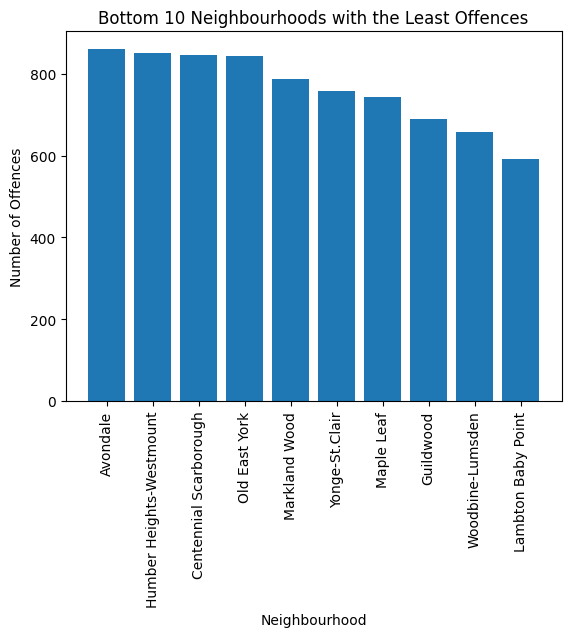

In [502]:
# prompt: ranking of least top 10 offence_counts_per_neig

# Get the bottom 10 neighbourhoods with the least offences
bottom_10_neighbourhoods = offence_counts_per_neig.tail(10)

# Create a bar chart
plt.bar(bottom_10_neighbourhoods.index, bottom_10_neighbourhoods)
plt.xticks(rotation=90)
plt.title('Bottom 10 Neighbourhoods with the Least Offences')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Offences')
plt.show()


It seems that there are a lot of reported crimes in West Humber-Clairville. However, it is not fair to solely use this information to determine whether a neighborhood is safer compared to others. This is because smaller neighborhoods like Maple Leaf may have fewer reported incidents compared to larger, more populated areas like Wellington Place.

# Data Preparation

At this point, we can start filtering the data we're most interested in, auto theft crime, between 2014 and 2023.

As we previously analyzed, there's no missing values that we need to worry about.

We also need to parse the cronological data and create the necessary structure

In [503]:
# prompt: filter df to only contain data with OFFENCE="Theft Of Motor Vehicle" and exclude the OCC_YEAR=2003 up to 2013

# Filter the data to only include auto theft crimes
df_auto_theft = df[(df['OFFENCE'] == 'Theft Of Motor Vehicle') & (df['OCC_YEAR'] >= 2014)]

# Remove data from 2003 to 2013
df_auto_theft = df_auto_theft[df_auto_theft['OCC_YEAR'] > 2013]

# translate month to number
df_auto_theft['OCC_MONTH'] = df_auto_theft['OCC_MONTH'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'], [1,2,3,4,5,6,7,8,9,10,11,12])


df_auto_theft.rename(columns={'OCC_YEAR': 'year', 'OCC_MONTH': 'month'}, inplace=True)
df_auto_theft['day'] = 1

# Create timeseries
df_auto_theft_ts = df_auto_theft[['year', 'month', 'day']]
df_auto_theft_ts['index_date'] = pd.to_datetime(df_auto_theft_ts)
df_auto_theft_ts.set_index('index_date', inplace=True)

df_auto_theft_ts

<ipython-input-503-c561417f5b4c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auto_theft_ts['index_date'] = pd.to_datetime(df_auto_theft_ts)


,year,month,day
index_date,,,
2014-01-01,2014.0,1,1
2014-01-01,2014.0,1,1
2014-01-01,2014.0,1,1
2014-01-01,2014.0,1,1
2014-01-01,2014.0,1,1
...,...,...,...
2023-12-01,2023.0,12,1
2023-12-01,2023.0,12,1
2023-12-01,2023.0,12,1


In [504]:
ts_per_month = df_auto_theft_ts.value_counts("index_date")
ts_per_month

index_date
2023-05-01    1154
2023-06-01    1125
2023-03-01    1096
2023-11-01    1092
2023-04-01    1081
              ... 
2017-02-01     233
2016-04-01     231
2016-02-01     222
2015-02-01     204
2015-01-01     202
Length: 120, dtype: int64

Text(0.5, 0, 'Date of offence')

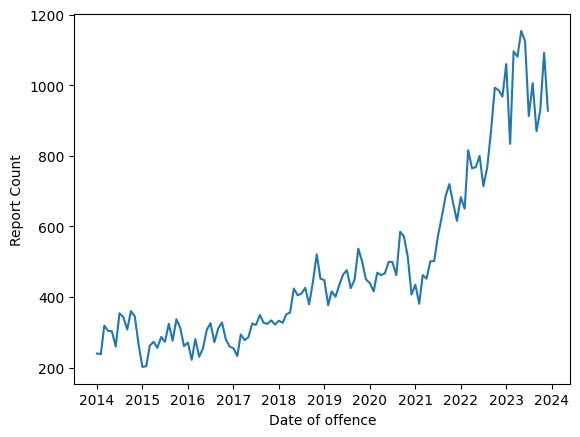

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(ts_per_month)

plt.ylabel("Report Count")
plt.xlabel("Date of offence")

We can see a trend upwards across the years.

During the Pandemic, the crimes decreased, and then we see an steady increase

# Trying multiple models

# 1. Divide the model between train and test

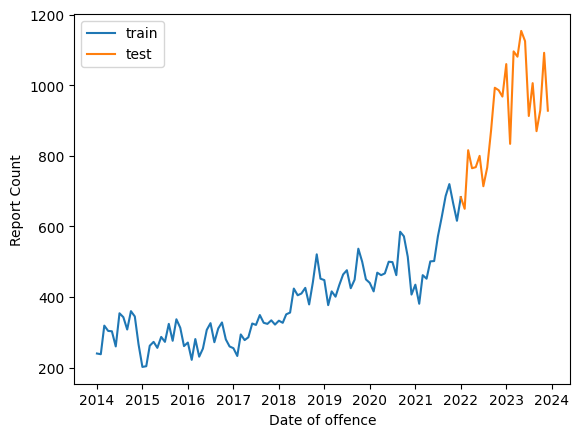

In [506]:
# Divide data between train and test

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns


train = ts_per_month[ts_per_month.index <= "2022-01-01"].sort_index()
test = ts_per_month[ts_per_month.index >= "2022-01-01"].sort_index()

# For linear regresion, we can add an index value
indexes_numb = np.arange(len(ts_per_month.index)+1)

X_train = [[x] for x in indexes_numb[0: len(train)]]
y_train = train.values

X_test = [[x] for x in indexes_numb[len(train): len(indexes_numb)]]
y_test = test.values

DEFAULT_GRAPHS = {
    "train": train,
    "test": test,
}

def display_autotheft(additional_graphs=None):
  plt.ylabel("Report Count")
  plt.xlabel("Date of offence")

  for label, data in DEFAULT_GRAPHS.items():
    sns.lineplot(data, label=label)

  if additional_graphs:
    for label, data in additional_graphs.items():
      sns.lineplot(data, label=label)

display_autotheft()

In [507]:
len(y_train)

97

# Implementation of multiple models

In [508]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import GridSearchCV

def evaluate_sarimax():
  model = SARIMAX(y_train, order = (1, 0, 0))
  sarimax_model = model.fit()
  start = len(train)
  end = len(train) + len(test) - 1
  predictions = sarimax_model.predict(start=start, end=end, dynamic=False)

  y_pred_df = test.copy()
  for i, value in enumerate(predictions):
    y_pred_df[i] = predictions[i]
  return y_pred_df

In [509]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def evaluate_exponential_smoothing():
  model = ExponentialSmoothing(y_train)
  fit_model = model.fit(smoothing_level=0.5, smoothing_slope=0.5)

  predictions = fit_model.forecast(len(test))

  y_pred_df = test.copy()
  for i, value in enumerate(predictions):
    y_pred_df[i] = predictions[i]
  return y_pred_df


In [510]:
def evaluate_sarimax_sesonal():
  model = SARIMAX(y_train, order = (1, 0, 0), seasonal_order=(2,2,2,12))
  sarimax_model = model.fit()
  start = len(train)
  end = len(train) + len(test) - 1
  predictions = sarimax_model.predict(start=start, end=end, dynamic=False)

  y_pred_df = test.copy()
  for i, value in enumerate(predictions):
    y_pred_df[i] = predictions[i]
  return y_pred_df

In [511]:
from statsmodels.tsa.arima.model import ARIMA

def evaluate_arimax():
  model = ARIMA(y_train, order = (1, 0, 0))
  sarimax_model = model.fit()
  start = len(train)
  end = len(train) + len(test) - 1
  predictions = sarimax_model.predict(start=start, end=end, dynamic=False)

  y_pred_df = test.copy()
  for i, value in enumerate(predictions):
    y_pred_df[i] = predictions[i]
  return y_pred_df

In [512]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid


def evaluate_profet():
  profet_train = train.copy()
  df_counts = pd.DataFrame({'y': profet_train, 'ds': profet_train.index})


  params_grid = {'seasonality_mode':('multiplicative','additive'),
                'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5, 1, 10],
                'holidays_prior_scale':[0.1,0.3,0.5, 1, 10],
                'n_changepoints' : [5, 50, 100, 200]}
  grid = ParameterGrid(params_grid)

  best_model = None
  best_model_score = -1
  best_model_result = None
  # Manual grid search

  for p in grid:
    m = Prophet(**p)
    m.fit(df_counts)

    future = m.make_future_dataframe(periods=len(test.values), freq='M', include_history=False)
    forecast = m.predict(future)
    result = forecast[['ds', 'yhat']]
    result = result.rename(columns={'ds': 'index_date', 'yhat': 'count'})
    result['count'] = result['count'].astype('int64')
    result.set_index('index_date')

    overall_result = pd.Series(result['count'].values, index=result['index_date'], dtype='int64')
    current_score = evaluate_model_result(overall_result)

    if current_score > best_model_score:
      best_model = m
      best_model_score = current_score
      best_model_result = overall_result

  return best_model_result

In [513]:
from sklearn.linear_model import Ridge


def evaluate_ridge():
  param_grid = {
      'alpha': [0.1, 1, 10, 100]
  }

  model = Ridge()

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  best_model = Ridge(alpha=best_params['alpha'])

  best_model.fit(X_train, y_train)

  y_pred = best_model.predict(X_test)

  df_result = pd.DataFrame(data=y_pred, index=test.index, columns=['count'])

  return pd.Series(df_result['count'], index=test.index, dtype='int64')


In [514]:
from sklearn.tree import DecisionTreeRegressor


def evaluate_decision_tree():
  param_grid = {
      'max_depth': [None, 5, 10, 20],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  model = DecisionTreeRegressor()

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  best_model = DecisionTreeRegressor(**best_params)

  best_model.fit(X_train, y_train)

  y_pred = best_model.predict(X_test)

  df_result = pd.DataFrame(data=y_pred, index=test.index, columns=['count'])

  return pd.Series(df_result['count'], index=test.index, dtype='int64')


In [515]:
from sklearn.ensemble import RandomForestRegressor

def evaluate_random_forest():
  param_grid = {
      'n_estimators': [100, 200, 300],
      'max_depth': [None, 10, 20],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  model = RandomForestRegressor()

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  best_model = RandomForestRegressor(**best_params)

  best_model.fit(X_train, y_train)

  y_pred = best_model.predict(X_test)

  df_result = pd.DataFrame(data=y_pred, index=test.index, columns=['count'])

  return pd.Series(df_result['count'], index=test.index, dtype='int64')


# Evaluation of all models

In [516]:

def evaluate_model_result(y_predicted_df):
  return mean_squared_error(test.values, y_predicted_df.values)

def evaluate_performance_models(models_test_result):
  for label, model_result in models_test_result.items():
    print(f"[{label}]RMSE: {evaluate_model_result(model_result)}")


Best Hyperparameters: {'alpha': 100}
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


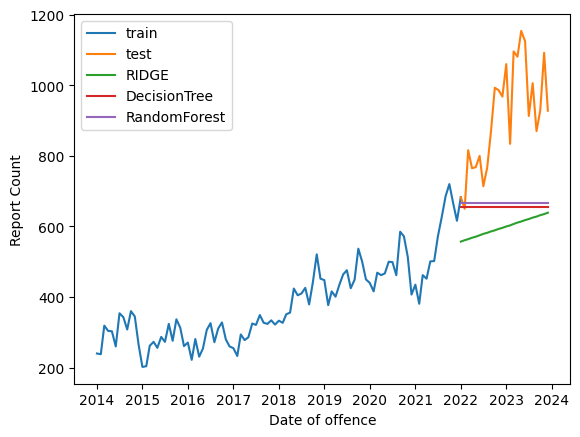

In [517]:
import numpy as np
from sklearn.metrics import mean_squared_error

linear_models = {
    "RIDGE": evaluate_ridge(),
    "DecisionTree": evaluate_decision_tree(),
    "RandomForest": evaluate_random_forest()
}
display_autotheft(linear_models)

In [518]:
evaluate_performance_models(linear_models)

[RIDGE]RMSE: 114543.25
[DecisionTree]RMSE: 87013.5
[RandomForest]RMSE: 80494.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-509-082f0aba6b46>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_model = model.fit(smoothing_level=0.5, smoothing_slope=0.5)


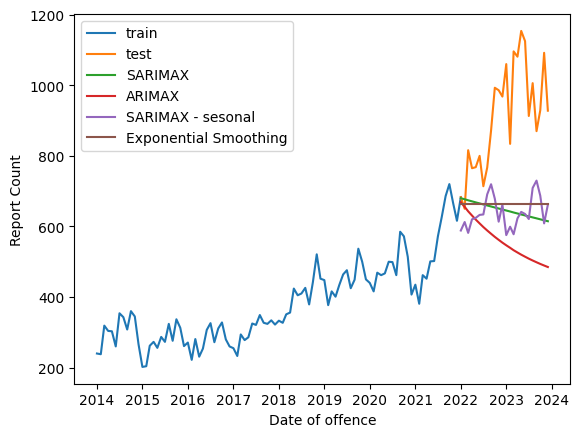

In [519]:
import numpy as np
from sklearn.metrics import mean_squared_error

arimax_models = {
    "SARIMAX": evaluate_sarimax(),
    "ARIMAX": evaluate_arimax(),
    "SARIMAX - sesonal": evaluate_sarimax_sesonal(),
    "Exponential Smoothing": evaluate_exponential_smoothing()
}


display_autotheft(arimax_models)

In [520]:
evaluate_performance_models(arimax_models)

[SARIMAX]RMSE: 95095.38284928202
[ARIMAX]RMSE: 159184.83004862323
[SARIMAX - sesonal]RMSE: 97012.20435403874
[Exponential Smoothing]RMSE: 82395.48280094985


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfdjqw_ep/81wjldcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfdjqw_ep/xx8eoag3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3595', 'data', 'file=/tmp/tmpfdjqw_ep/81wjldcc.json', 'init=/tmp/tmpfdjqw_ep/xx8eoag3.json', 'output', 'file=/tmp/tmpfdjqw_ep/prophet_model5l73iuju/prophet_model-20240402220629.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:06:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

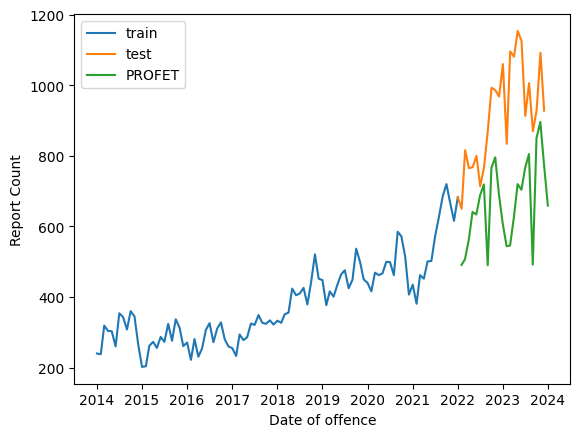

In [521]:
import numpy as np
from sklearn.metrics import mean_squared_error

opensource_models = {
    "PROFET": evaluate_profet(),
    # TODO (add more models, eg. LSTM or an opensource model)
}


display_autotheft(opensource_models)

In [522]:
evaluate_performance_models(opensource_models)

[PROFET]RMSE: 83056.0


# Evaluating each model using RMSE

In [523]:
ALL_MODELS = [linear_models, arimax_models, opensource_models]

for models in ALL_MODELS:
  evaluate_performance_models(models)


[RIDGE]RMSE: 114543.25
[DecisionTree]RMSE: 87013.5
[RandomForest]RMSE: 80494.0
[SARIMAX]RMSE: 95095.38284928202
[ARIMAX]RMSE: 159184.83004862323
[SARIMAX - sesonal]RMSE: 97012.20435403874
[Exponential Smoothing]RMSE: 82395.48280094985
[PROFET]RMSE: 83056.0


# Interpreting Results



TODO: Add result interpretation here